# Modelando precios de casas - Navent Dataset

## Introducción

Vamos a trabajar en equipo para obtener el mejor resultado posible en la competencia de Valuación de casas de Fundacion Sadosky: https://metadata.fundacionsadosky.org.ar/competition/4/.

El objetivo será generar un modelo de regresión que nos acerque lo más posible al top ten de la competencia con la métrica seleccionada (RMSLE).

Antes de empezar vamos a tener que tener en cuenta algunos puntos:

- La competencia ya finalizó, por lo que no podemos cargar nuestros datos en la página y comparar directamente con los resultados del dataset de test. Por ello, dividiremos el dataset de training en dos: el que usaremos para modelar, y uno hold-out para validar que usaremos para comparar los mejores modelos que ustedes hayan generado.
- Vamos a trabajar en equipo, con la idea de que esto ayude a la comprensión del problema y a la búsquedas de estrategias para mejorar nuestro modelo, es sumamente importante que todos participen y discutan las decisiones que toman.
- Vamos a trabajar con este dataset en las próximas 3 clases, incorporando nuevas técnicas y conceptos para intentar mejorar nuestros modelos, por lo que no tienen que apurarse para resolver todo en la primera semana, tienen tiempo de analizar el problema e ir iterando en las posibles soluciones.
- Por último, recuerden que es un proceso iterativo, es recomendable que empiecen simple, lleguen a entrenar un modelo no tan complejo, obtengan un resultado, y luego vayan avanzando sobre eso.

## Actividades

1. Repasar el notebook introductorio provisto por Navent:
https://metadata.fundacionsadosky.org.ar/media/navent/metaDataNavent.ipynb

2. Investigar acerca de la métrica seleccionada (RMSLE): https://hrngok.github.io/posts/metrics/

3. Dividir el dataset en dos partes: una parte para training-validation, y una parte para hold-out, ésta última debe tener el 25% de los datos. Deben usar train_test_split de Scikit Learn con random_state=42 (esto es sólo para que todos tengamos el mismo split y las comparaciones entre sus modelos sean equivalentes)

4. Aplicar pre procesamiento que consideren necesario sobre los datos. Pueden usar como ejemplo lo que está hecho en el notebook del punto 1, pero sería interesante que tomen decisiones basados en un análisis propio: ¿agregarían o quitarían features? ¿Cambiarían algo del procesamiento de las features categóricas?

5. Modelar el problema. Deben entrenar modelos usando cross validation y grid/random search, para ello deben seleccionar que algoritmos de regresión van a probar: hasta ahora sólo hemos visto Regresión Lineal y Árboles de decisión, pero pueden seleccionar otro modelo lineal de la librería Scikit Learn: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model. Acá sería bueno que investiguen respecto a algoritmos que vayan a elegir: ¿Que aportan sobre una regresión lineal tradicional? ¿Qué hiperparámetros se pueden configurar? 

6. Luego de entrenar con validación cruzada y búsqueda de hiperparámetros, comprobar el funcionamiento del modelo sobre el dataset hold out. Recuerden que esto debe hacerse solo al final para comparar modelos, no para optimizar hiperparámetros, por lo que es el paso final del proceso.

7. Generar un notebook con explicaciones claras del proceso realizado, las decisiones que se tomaron, y el resultado obtenido. 


In [62]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(3)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0


In [63]:
df.shape

(240000, 23)

In [64]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
tipodepropiedad,46,0.02
provincia,155,0.06


In [65]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [66]:
df = df[df['tipodepropiedad'].notna()]
df = df[df['ciudad'].notna()]
df = df[df['provincia'].notna()]

In [67]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls
#Borramos las filas nulas de ciudad, provincia y tipo de propiedad

,nulls,porcentaje
id,0,0.00
escuelascercanas,0,0.00
piscina,0,0.00
usosmultiples,0,0.00
gimnasio,0,0.00
fecha,0,0.00
centroscomercialescercanos,0,0.00
precio,0,0.00
provincia,0,0.00
ciudad,0,0.00


In [68]:
columnas_descartables = ['lng','lat','direccion','fecha','idzona','banos','habitaciones', 'garages', 'titulo', 'descripcion', 'id','piscina','usosmultiples','gimnasio','centroscomercialescercanos','escuelascercanas']
df = df.drop(columns=columnas_descartables)
df.shape

(239600, 7)

In [69]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
tipodepropiedad,0,0.00
ciudad,0,0.00
provincia,0,0.00
precio,0,0.00
metroscubiertos,17341,7.24
antiguedad,43328,18.08
metrostotales,51361,21.44


In [70]:
def custom_division(x, y):
    if y > 0:
        res = y 
    else:
        res = x
    return res
df['metrostotales'] = df.apply(lambda x: custom_division(x['metrostotales'], x['metroscubiertos']), axis = 1)
#df.drop([‘price_usd_per_m2’], axis=1, inplace=True)

In [71]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
tipodepropiedad,0,0.00
ciudad,0,0.00
provincia,0,0.00
metrostotales,0,0.00
precio,0,0.00
metroscubiertos,17341,7.24
antiguedad,43328,18.08


In [72]:
def custom_division(x, y):
    if y > 0:
        res = y 
    else:
        res = x
    return res
df['metroscubiertos'] = df.apply(lambda x: custom_division(x['metroscubiertos'], x['metrostotales']), axis = 1)
df

,tipodepropiedad,ciudad,provincia,antiguedad,metroscubiertos,metrostotales,precio
0,Apartamento,Benito Juárez,Distrito Federal,NaN,80.0,80.0,2273000.0
1,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.0,268.0,268.0,3600000.0
2,Casa,Tonalá,Jalisco,5.0,144.0,144.0,1200000.0
3,Casa,Zinacantepec,Edo. de México,1.0,63.0,63.0,650000.0
4,Apartamento,Zapopan,Jalisco,10.0,95.0,95.0,1150000.0
...,...,...,...,...,...,...,...
239995,Casa,Zinacantepec,Edo. de México,0.0,67.0,67.0,650000.0
239996,Casa,Toluca,Edo. de México,0.0,200.0,200.0,1940000.0
239997,Apartamento,Benito Juárez,Distrito Federal,20.0,138.0,138.0,3400000.0
239998,Casa,Iztapalapa,Distrito Federal,20.0,235.0,235.0,2890000.0


In [73]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
tipodepropiedad,0,0.00
ciudad,0,0.00
provincia,0,0.00
metroscubiertos,0,0.00
metrostotales,0,0.00
precio,0,0.00
antiguedad,43328,18.08


In [74]:
df = df.dropna(subset=['antiguedad'])
nulls = pd.DataFrame(df.isnull().sum().sort_values(), columns=['nulls'])
nulls['porcentaje'] = round(100*nulls['nulls'] / len(df), 2)
nulls

,nulls,porcentaje
tipodepropiedad,0,0.0
ciudad,0,0.0
provincia,0,0.0
antiguedad,0,0.0
metroscubiertos,0,0.0
metrostotales,0,0.0
precio,0,0.0


In [75]:
df.shape

(196272, 7)

In [80]:
import matplotlib.pyplot as plt
df['antiguedad'].describe()

count    196272.000000
mean          8.115299
std           9.551799
min           0.000000
25%           0.000000
50%           5.000000
75%          10.000000
max          80.000000
Name: antiguedad, dtype: float64

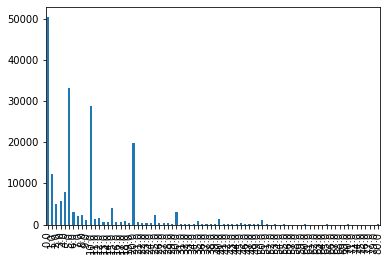

<Figure size 1800x504 with 0 Axes>

In [87]:
df['antiguedad'].value_counts().sort_index().plot.bar();
plt.figure(figsize=(25,7));

In [89]:
df = df[(df['antiguedad']<21)]
df.head(4)

,tipodepropiedad,ciudad,provincia,antiguedad,metroscubiertos,metrostotales,precio
1,Casa en condominio,La Magdalena Contreras,Distrito Federal,10.0,268.0,268.0,3600000.0
2,Casa,Tonalá,Jalisco,5.0,144.0,144.0,1200000.0
3,Casa,Zinacantepec,Edo. de México,1.0,63.0,63.0,650000.0
4,Apartamento,Zapopan,Jalisco,10.0,95.0,95.0,1150000.0


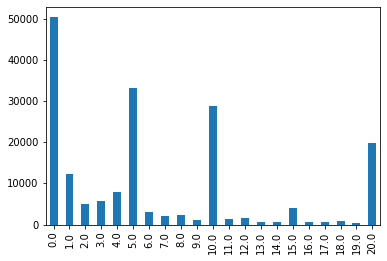

<Figure size 1800x504 with 0 Axes>

In [90]:
df['antiguedad'].value_counts().sort_index().plot.bar();
plt.figure(figsize=(25,7));

In [109]:
X = df.drop(['precio'], axis=1)
y = df.precio

In [110]:
X_1.shape

(136804, 6)

In [111]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(['tipodepropiedad'])
df['tipodepropiedad'] = le.fit_transform(df.tipodepropiedad)
le.fit(['ciudad'])
df['ciudad'] = le.fit_transform(df.ciudad)
le.fit(['provincia'])
df['provincia'] = le.fit_transform(df.provincia)
df

,tipodepropiedad,ciudad,provincia,antiguedad,metroscubiertos,metrostotales,precio
1,3,330,8,10.0,268.0,268.0,3600000.0
2,2,687,14,5.0,144.0,144.0,1200000.0
3,2,773,10,1.0,63.0,63.0,650000.0
4,0,763,14,10.0,95.0,95.0,1150000.0
5,0,180,8,5.0,75.0,75.0,1100000.0
...,...,...,...,...,...,...,...
239995,2,773,10,0.0,67.0,67.0,650000.0
239996,2,686,10,0.0,200.0,200.0,1940000.0
239997,0,79,8,20.0,138.0,138.0,3400000.0
239998,2,297,8,20.0,235.0,235.0,2890000.0


In [112]:
from sklearn.model_selection import train_test_split

X_1, X_hold_out, y_1, y_hold_out = train_test_split(X, y, test_size=0.25, random_state=42)

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [115]:
dtr = DecisionTreeRegressor()
dtr.fit(X_1,y_1)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [118]:
from sklearn.metrics import mean_squared_error
y_train_pred = dtr.predict(X_1)
y_test_pred = dtr.predict(X_hold_out)

In [126]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [127]:
#En esta celda calculá el rmse
import numpy as np
print('Error en datos de train:', RMSLE(y_1, y_train_pred))
print('Error en datos de test:', RMSLE(y_hold_out, y_test_pred))

Error en datos de train: 0.2124425682520176
Error en datos de test: 0.47090358209230593


In [129]:
from sklearn.ensemble import RandomForestRegressor

In [130]:
clr = RandomForestRegressor(n_estimators=200, max_features= 4, n_jobs=-1, oob_score = True, random_state = 42)
clr.fit(X_1,y_1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [135]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [137]:
y_train_pred = clr.predict(X_1)
y_test_pred = clr.predict(X_hold_out)
print(RMSLE(y_1, y_train_pred))
print(RMSLE(y_hold_out, y_test_pred))

0.25082976621824743
0.40364613079393424


In [139]:
train_accuracy = []
test_accuracy = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clr = RandomForestRegressor(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clr.fit(X_1,y_1)
    
    y_train_pred = clr.predict(X_1)
    y_test_pred = clr.predict(X_hold_out)
    
    train_accuracy.append(RMSLE(y_1, y_train_pred))
    test_accuracy.append(RMSLE(y_hold_out, y_test_pred))
    oob_scores.append(clr.oob_score_)
    
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)
oob_scores = np.array(oob_scores)

1


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


2


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


3


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


4


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


25


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


50
100
250
500
1000


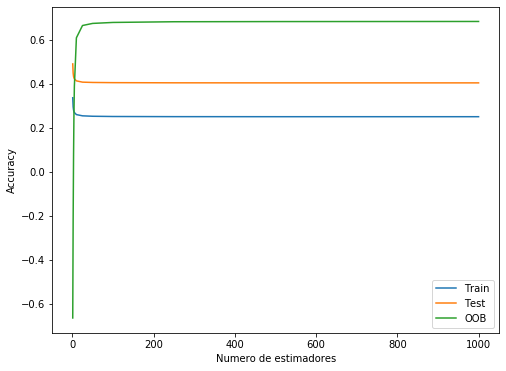

In [140]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_accuracy, label = 'Train')
plt.plot(N_estimadores, test_accuracy, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSLE')
plt.legend()
# plt.xlim(0,50)
plt.show()

In [143]:
train_RMSLE = []
test_RMSLE = []
oob_scores = []

N_estimadores = [1,2,3,4,5,10,25,50,100,250]
for estimadores in N_estimadores:
    print(estimadores)
    clr = RandomForestRegressor(n_estimators=estimadores, n_jobs=-1, oob_score= True, random_state = 42)
    clr.fit(X_1,y_1)
    
    y_train_pred = clr.predict(X_1)
    y_test_pred = clr.predict(X_hold_out)
    
    train_RMSLE.append(RMSLE(y_1, y_train_pred))
    test_RMSLE.append(RMSLE(y_hold_out, y_test_pred))
    oob_scores.append(clr.oob_score_)
    
train_RMSLE = np.array(train_RMSLE)
test_RMSLE = np.array(test_RMSLE)
oob_scores = np.array(oob_scores)

1


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


2


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


3


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


4


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


5


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


25


C:\Users\Noelia\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


50
100
250


In [144]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [145]:
y_train_pred = clr.predict(X_1)
y_test_pred = clr.predict(X_hold_out)
print(RMSLE(y_1, y_train_pred))
print(RMSLE(y_hold_out, y_test_pred))

0.2511297601901109
0.4049547165762896


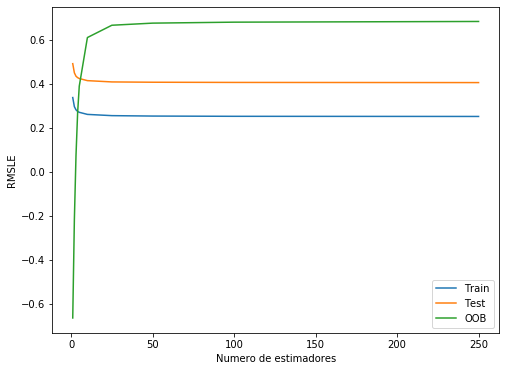

In [147]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_RMSLE, label = 'Train')
plt.plot(N_estimadores, test_RMSLE, label = 'Test')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSLE')
plt.legend()
# plt.xlim(0,50)
plt.show()